Membuat model unsupervised learning dengan teknik K-Means Clustering.

In [1]:
import pandas as pd

#ubah file csv menjadi dataframe
df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Processing

In [2]:
# ubah nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
 
# ubah data kategorik menjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
 
# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


## K-Means metode Elbow.

In [5]:
import os
# Mengatur variabel lingkungan OMP_NUM_THREADS untuk menghindari peringatan
os.environ['OMP_NUM_THREADS'] = '1'

In [6]:
from sklearn.cluster import KMeans

# Menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

# Membuat list yang berisi inertia
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10, random_state=42).fit(X)
    clusters.append(km.inertia_)

c:\Users\Yogik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Yogik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Yogik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Yogik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'Inertia')

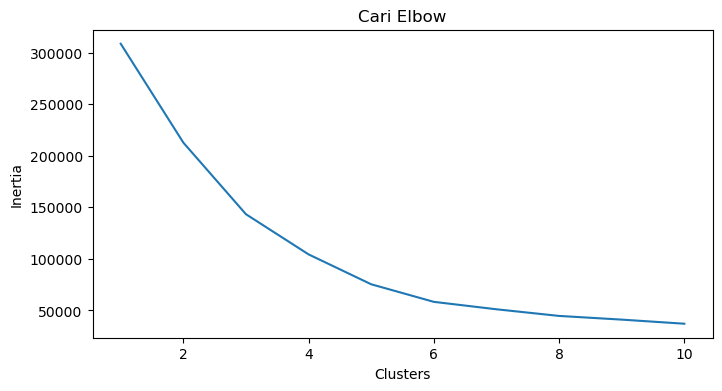

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Elbow berada di nilai K sama dengan 5, karena penurunan inersia pada K seterusnya tidak lagi signifikan (perubahannya nilainya kecil). Sehingga jumlah klaster yang optimal adalah 5.

c:\Users\Yogik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Yogik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


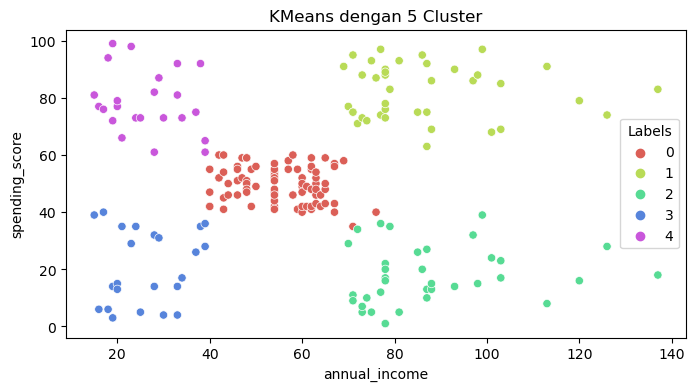

In [6]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)
 
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

In [9]:
# Membuat DataFrame baru berdasarkan klaster
clustered_data = X.copy()

# Menampilkan lima baris pertama dari data yang telah dikelompokkan
print(clustered_data)

# Menyimpan DataFrame ke file CSV
clustered_data.to_csv('clustered_data.csv', index=False)



     age  annual_income  spending_score  Labels
0     19             15              39       3
1     21             15              81       4
2     20             16               6       3
3     23             16              77       4
4     31             17              40       3
..   ...            ...             ...     ...
195   35            120              79       1
196   45            126              28       2
197   32            126              74       1
198   32            137              18       2
199   30            137              83       1

[200 rows x 4 columns]


Klaster 0: Pelanggan dengan pendapatan tahunan tinggi dan skor pengeluaran rendah. Rekomendasi: Tawarkan produk mewah dan premium, serta promosi yang dapat menarik minat mereka untuk meningkatkan pengeluaran.

Klaster 1: Pelanggan dengan pendapatan tahunan rendah dan skor pengeluaran tinggi. Rekomendasi: Tawarkan produk dengan harga terjangkau dan promosi diskon yang menarik, serta program loyalitas untuk mempertahankan pelanggan.

Klaster 2: Pelanggan dengan pendapatan tahunan dan skor pengeluaran yang keduanya tinggi. Rekomendasi: Tawarkan produk premium dan eksklusif serta program loyalitas VIP dan pengalaman pelanggan yang personal.

Klaster 3: Pelanggan dengan pendapatan tahunan dan skor pengeluaran yang keduanya rendah. Rekomendasi: Fokus pada produk ekonomis dan promosi besar-besaran untuk menarik minat pelanggan.

Klaster 4: Pelanggan dengan pendapatan tahunan sedang dan skor pengeluaran sedang. Rekomendasi: Tawarkan variasi produk yang beragam dan program promosi yang bisa meningkatkan loyalitas pelanggan.